In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color='blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')
    
def display(m, b, color='g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

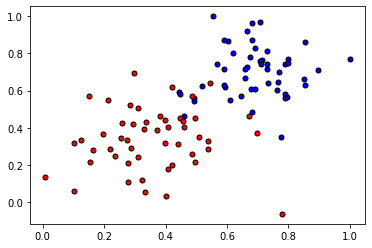

In [16]:
#Reading and plotting the data

data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0, 1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [17]:
#Activation ( Sigmoid ) Function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_function(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1 - output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

In [22]:
#Training function using random weights because this is a practice test...

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_function(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        out = output_formula(features, weights, bias)
        loss = np.mean(error_function(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train Loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train Loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            
    # Plotting the graphs
    
    plt.title("Solution Boundry")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')
    
    plot_points(features, targets)
    plt.show()
    
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train Loss:  0.6292681287134033
Accuracy:  0.52

========== Epoch 10 ==========
Train Loss:  0.5143593197792341
Accuracy:  0.81

========== Epoch 20 ==========
Train Loss:  0.4693836316800936
Accuracy:  0.91

========== Epoch 30 ==========
Train Loss:  0.43367711754484867
Accuracy:  0.93

========== Epoch 40 ==========
Train Loss:  0.4045342199082416
Accuracy:  0.92

========== Epoch 50 ==========
Train Loss:  0.38037396490488035
Accuracy:  0.92

========== Epoch 60 ==========
Train Loss:  0.3600626158140994
Accuracy:  0.93

========== Epoch 70 ==========
Train Loss:  0.34277135640912
Accuracy:  0.93

========== Epoch 80 ==========
Train Loss:  0.32788536261696954
Accuracy:  0.93

========== Epoch 90 ==========
Train Loss:  0.3149416637113466
Accuracy:  0.93


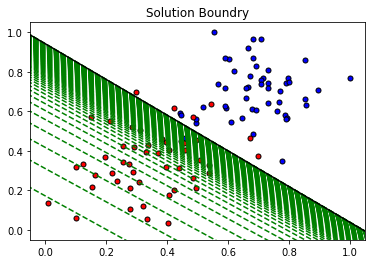

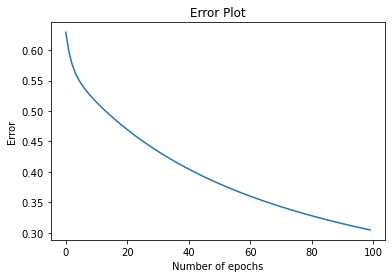

In [28]:
train(X, y, epochs, learnrate, graph_lines=True)

In [7]:
import pandas as pd

pd.get_dummies?